## The two porfolios below (high and low beta) are the top 10 constituents held in the S&P500 High Beta and Low Volatility ETFs.

## For more Information:
    High Beta ETF:  https://www.spglobal.com/spdji/en/indices/strategy/sp-500-high-beta-index/#overview
    Low Vol ETF:  https://www.spglobal.com/spdji/en/indices/strategy/sp-500-low-volatility-index/#overview

## The purpose of this notebook is to illustrate some of the more important risk adjusted returns which are:
    Sharpe Ratio
    Sortino Ratio
    Information Ratio
    Treynor Ratio (which needs more work)
    Max Drawdown
    Calmar Ratio



In [1]:
import pandas_datareader.data as web
import datetime as dt
import seaborn as sns
import numpy as np
import pandas as pd
#import yahoo_fin.stock_info as si
import yfinance as yf
import matplotlib.pyplot as plt
from scipy import stats
from tabulate import tabulate
plt.rcParams['figure.figsize'] = (15,8)

In [2]:
#set timeframe for closing prices
start = dt.datetime(2017, 2, 15)
end = dt.datetime(2022, 2, 16)

In [3]:
#Get end of day closing prices using yahoo datareader

high_beta_stocks = ['OXY', 'LRCX', 'APA', 'AMAT', 'MRO', 'MU', 'FANG', 'MCHP', 'DVN', 'KLAC']

low_beta_stocks =  ['PEP', 'PG', 'HSY', 'VZ', 'CERN', 'MKC', 'JNJ', 'MDLZ', 'CL', 'KO']

high_beta_df = web.DataReader(high_beta_stocks,'yahoo',start,end)['Adj Close']
high_beta_df.head()

Symbols,OXY,LRCX,APA,AMAT,MRO,MU,FANG,MCHP,DVN,KLAC
Date,,,,,,,,,,
2017-02-15,55.594036,107.251869,50.238022,33.298584,15.286110,22.963383,104.628769,33.165585,38.090164,79.226540
2017-02-16,54.957115,105.720100,49.930767,33.007725,15.164199,22.923481,101.981247,33.244854,37.986828,79.994583
2017-02-17,54.816490,106.024605,50.102474,33.562866,15.220466,23.292570,100.690239,33.230942,38.038490,79.931343
2017-02-21,55.403782,108.719055,50.509151,34.419109,15.361135,23.711538,99.951149,33.601833,38.804947,81.729492
2017-02-22,54.518715,109.420334,49.623493,34.353260,14.779702,23.691587,95.451302,33.861439,37.685413,81.566856


Symbols,OXY,LRCX,APA,AMAT,MRO,MU,FANG,MCHP,DVN,KLAC,High_Beta_Port
Date,,,,,,,,,,,
2022-02-16,0.713206,5.514775,0.64493,4.233213,1.378376,4.183181,1.240768,2.268364,1.413751,4.867687,2.765777


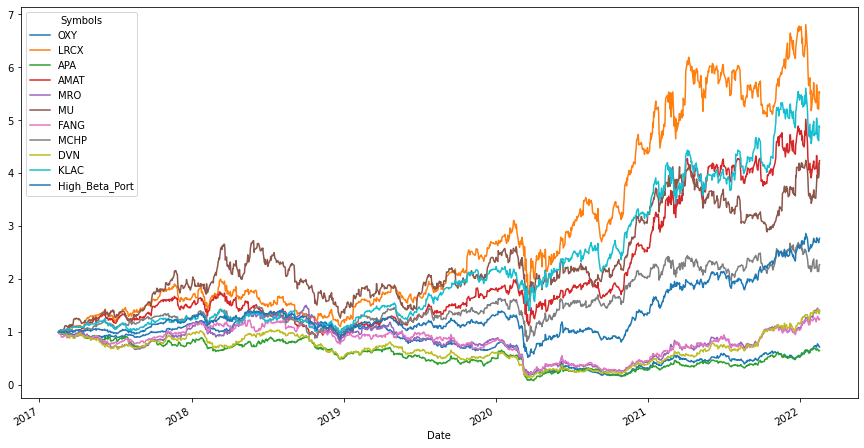

In [4]:
# Dollar test High_Beta_Port

high_beta_df = high_beta_df.pct_change().dropna()
high_beta_df['High_Beta_Port'] = high_beta_df.mean(axis=1)
(high_beta_df+1).cumprod().plot()
(high_beta_df+1).cumprod()[-1:]

<AxesSubplot:xlabel='Symbols'>

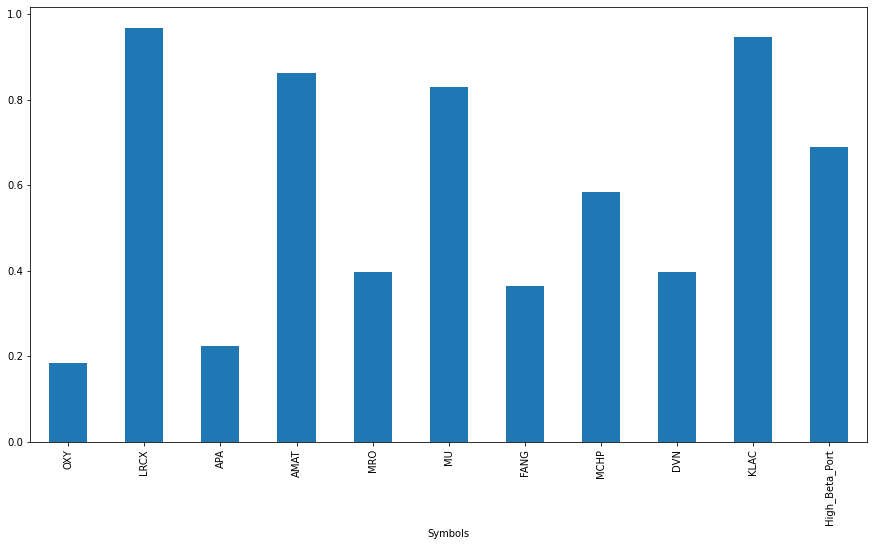

In [5]:
#Calculate Sharpe Ratio - useful calcuation to compare returns minus risk-free rate vs. risk (total standard deviation).  
#Sharpe ratios >1 are considered good. Sharpe ratios <1 not ideal.  The higher the better.

def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 252 #252 trading days in a year
rf =0.01 #1% risk free rate
high_beta_sharpe_ratio = high_beta_df.apply(sharpe_ratio, args=(N,rf,),axis=0)

high_beta_sharpe_ratio.plot.bar()

In [6]:
#Information Ratio - The information ratio is an extension of the Sharpe ratio which replaces the risk-free rate of return with
#the returns of a benchmark portfolio. It measures a trader’s ability to generate excess returns relative to a benchmark.

#Formula:   IR Ratio = (Portfolio Return - Benchmark Return) / Tracking Error
            #Tracking error = Portfolio Standard Deviation - Benchmark Standard Deviation 

def information_ratio(stock, benchmark, start_date, end_date):
    data = pd.DataFrame()
    bench = pd.DataFrame()
    data = web.DataReader(stock, data_source = 'yahoo', start=start_date, end=end_date)['Adj Close']
    bench = web.DataReader(benchmark, data_source = 'yahoo', start=start_date, end=end_date)['Adj Close']
    for i in stock:
        data['daily_return_'+i] = data[i].pct_change()
        bench['daily_return'] = bench.pct_change()
        return_i = np.prod(data['daily_return_'+i] + 1) - 1
        return_bench = np.prod(bench['daily_return'] + 1) - 1
        te_i = (data['daily_return_'+ i] - bench['daily_return']).std()*np.sqrt(252)
        ir_i = (return_i - return_bench) / te_i
        print (i, 'Information ratio is {} and Tracking Error is {}'.format(round(ir_i,2),str(round(te_i*100,2))+'%'))
        

In [7]:
# When I try and pass a list of tickers I get an error, will need to continue trouble shooting this

information_ratio(['OXY'],['^GSPC'], '2-15-2017', '2-16-2022')
information_ratio(['LRCX'],['^GSPC'], '2-15-2017', '2-16-2022')
information_ratio(['APA'],['^GSPC'], '2-15-2017', '2-16-2022')
information_ratio(['AMAT'],['^GSPC'], '2-15-2017', '2-16-2022')
information_ratio(['MRO'],['^GSPC'], '2-15-2017', '2-16-2022')
information_ratio(['MU'],['^GSPC'], '2-15-2017', '2-16-2022')
information_ratio(['FANG'],['^GSPC'], '2-15-2017', '2-16-2022')
information_ratio(['MCHP'],['^GSPC'], '2-15-2017', '2-16-2022')
information_ratio(['DVN'],['^GSPC'], '2-15-2017', '2-16-2022')
information_ratio(['KLAC'],['^GSPC'], '2-15-2017', '2-16-2022')

OXY Information ratio is -2.28 and Tracking Error is 52.26%
LRCX Information ratio is 10.7 and Tracking Error is 33.74%
APA Information ratio is -2.05 and Tracking Error is 61.45%
AMAT Information ratio is 7.21 and Tracking Error is 32.3%
MRO Information ratio is -1.02 and Tracking Error is 51.37%
MU Information ratio is 6.14 and Tracking Error is 37.12%
FANG Information ratio is -1.25 and Tracking Error is 52.93%
MCHP Information ratio is 1.24 and Tracking Error is 29.29%
DVN Information ratio is -0.99 and Tracking Error is 49.83%
KLAC Information ratio is 9.73 and Tracking Error is 30.45%


In [8]:
#Treynor Index 

#TI = Portfolio Return - Risk Free Rate / Portfolio Beta

def treynor_ratio(stocks, start_date, end_date, rfr):
    data = pd.DataFrame()
    ret = pd.DataFrame()
    bench = pd.DataFrame()
    for i in stocks:
        data[i] = web.DataReader(i, data_source='yahoo', start=start_date, end=end_date)['Adj Close']
        bench['S&P'] = web.DataReader('^GSPC', data_source='yahoo', start=start_date, end=end_date)['Adj Close']
        ret[i] = data[i].pct_change()
        bench['Ret'] = bench['S&P'].pct_change()
        cumu_i = (data[i][-1] / data[i][0]) - 1
        beta_i = stats.linregress(ret[i].dropna(),bench['Ret'].dropna())[0]  
        treynor_i = (cumu_i - rfr/100 / beta_i)
        print(tabulate([['Stocks', 'Cumulative Return', 'Beta', 'Treynor Ratio'],[i,cumu_i,beta_i,treynor_i]],headers='firstrow'))
        print('\n')

In [9]:
treynor_ratio(['OXY', 'LRCX', 'APA', 'AMAT', 'MRO', 'MU', 'FANG', 'MCHP', 'DVN', 'KLAC', 'BTC-USD'],'2017-2-15','2022-2-16',2)

Stocks      Cumulative Return      Beta    Treynor Ratio
--------  -------------------  --------  ---------------
OXY                 -0.286794  0.164009        -0.408738


Stocks      Cumulative Return      Beta    Treynor Ratio
--------  -------------------  --------  ---------------
LRCX                  4.51477  0.307934          4.44983


Stocks      Cumulative Return      Beta    Treynor Ratio
--------  -------------------  --------  ---------------
APA                  -0.35507  0.136587        -0.501497


Stocks      Cumulative Return      Beta    Treynor Ratio
--------  -------------------  --------  ---------------
AMAT                  3.23322  0.322018          3.17111


Stocks      Cumulative Return      Beta    Treynor Ratio
--------  -------------------  --------  ---------------
MRO                  0.378375  0.163245          0.25586


Stocks      Cumulative Return      Beta    Treynor Ratio
--------  -------------------  --------  ---------------
MU                   

Text(0, 0.5, 'Sortino Ratio')

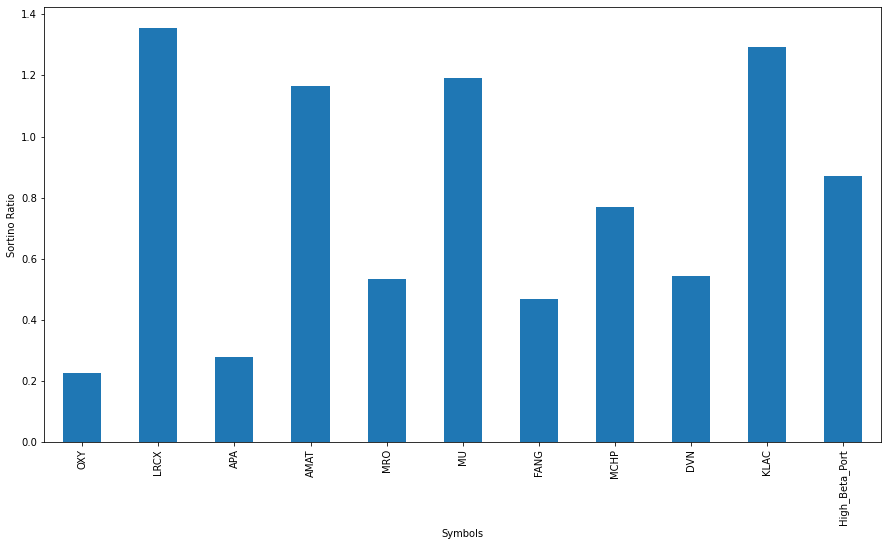

In [10]:
#Calculate Sortino Ratio The Sortino ratio is a useful way for investors, analysts, and portfolio managers 
#to evaluate an investment's return for a given level of downside deviation only whereas the sharpe ratio
#punishes stocks who have both positive and negative standard deviation (total standard deviation).  

def sortino_ratio(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg


high_beta_sortino_ratio = high_beta_df.apply(sortino_ratio, args=(N,rf,), axis=0 )
high_beta_sortino_ratio.plot.bar()
plt.ylabel('Sortino Ratio')

Text(0, 0.5, 'Max Drawdown')

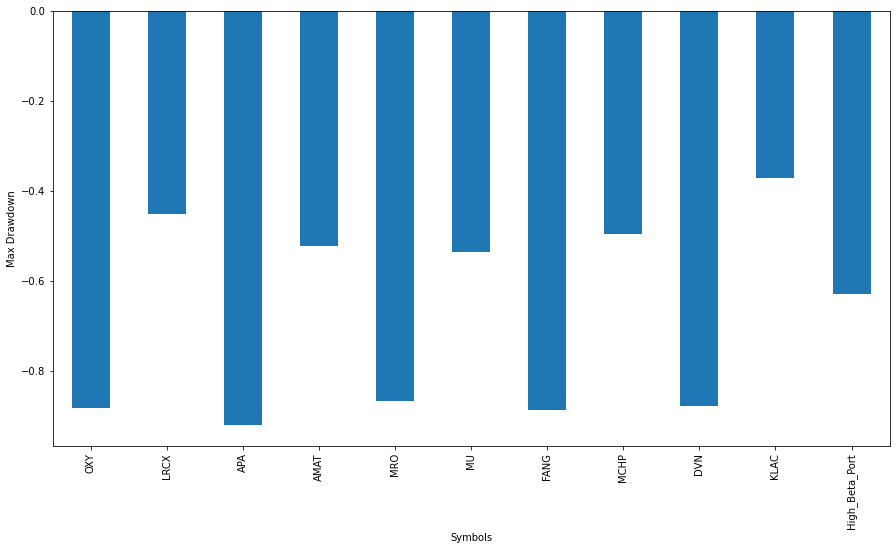

In [11]:
#Draw downs represent a pull back in stock prices and is measured from peak to bottom.  The stocks that tend to have 
#larger draw downs are usually those that have higher volatility.  


def max_drawdown(return_series):
    comp_ret = (return_series+1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()


high_beta_max_drawdowns = high_beta_df.apply(max_drawdown,axis=0)
high_beta_max_drawdowns.plot.bar()
plt.ylabel('Max Drawdown')

Text(0, 0.5, 'Calmar ratio')

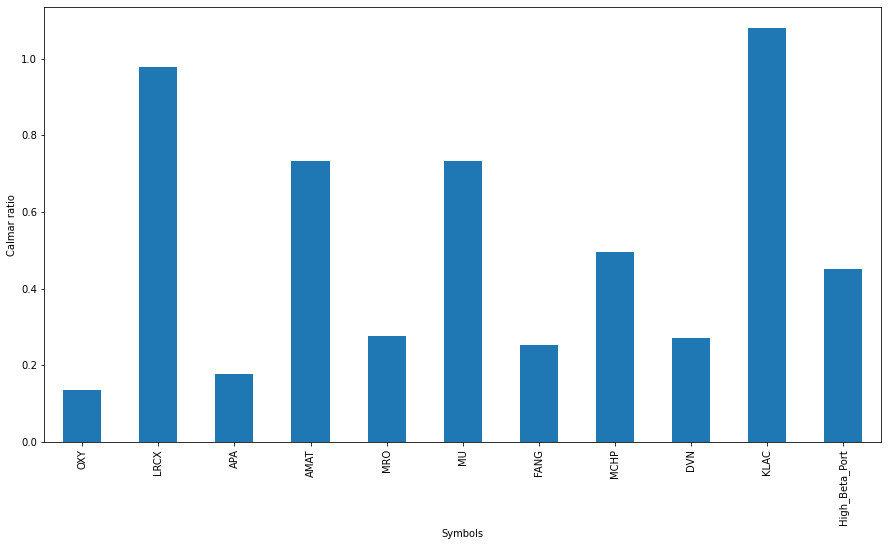

In [12]:
#Calmer ratio is similar to above ratio's instead we divide the percentage daily returns divided by the
#max draw down instead of standard deviation. 

high_beta_calmar_ratio = high_beta_df.mean()*252/abs(high_beta_max_drawdowns)

high_beta_calmar_ratio.plot.bar()
plt.ylabel('Calmar ratio')

In [13]:
btstats = pd.DataFrame()
btstats['sharpe'] = high_beta_sharpe_ratio
btstats['sortino'] = high_beta_sortino_ratio
btstats['maxdd'] = high_beta_max_drawdowns
btstats['calmar'] = high_beta_calmar_ratio

btstats

,sharpe,sortino,maxdd,calmar
Symbols,,,,
OXY,0.185224,0.225345,-0.883888,0.135297
LRCX,0.967716,1.355539,-0.450401,0.978039
APA,0.223939,0.278791,-0.921822,0.176944
AMAT,0.862668,1.164652,-0.522742,0.732293
MRO,0.397236,0.534608,-0.867047,0.276969
MU,0.830143,1.192342,-0.536570,0.733069
FANG,0.364175,0.466588,-0.887160,0.254268
MCHP,0.583643,0.768453,-0.496835,0.495769
DVN,0.396165,0.543098,-0.877854,0.270585


In [14]:
#Get end of day closing prices using yahoo datareader
low_beta_stocks = web.DataReader(low_beta_stocks,'yahoo',start,end)['Adj Close']
low_beta_stocks.head()

Symbols,PEP,PG,HSY,VZ,CERN,MKC,JNJ,MDLZ,CL,KO
Date,,,,,,,,,,
2017-02-15,92.139099,79.223389,96.565735,38.440296,53.426777,44.732029,102.059746,40.766716,61.029305,34.358902
2017-02-16,93.339066,78.936462,95.545036,38.744110,53.950665,44.455456,102.826057,38.816883,61.376213,35.004604
2017-02-17,93.364944,79.197304,95.190025,39.327747,54.474545,44.985554,103.505318,38.187908,64.026970,35.030113
2017-02-21,94.409538,79.701576,96.281723,39.519623,53.620800,45.414261,104.201981,40.407299,65.094360,35.225521
2017-02-22,94.452690,79.501625,96.360260,39.711510,53.717815,45.179169,104.080048,40.119762,65.370117,35.344471


Symbols,PEP,PG,HSY,VZ,CERN,MKC,JNJ,MDLZ,CL,KO,Low_Beta_Port
Date,,,,,,,,,,,
2022-02-16,1.80488,1.994487,2.08924,1.389167,1.720486,2.199543,1.627904,1.611854,1.283646,1.772466,1.813195


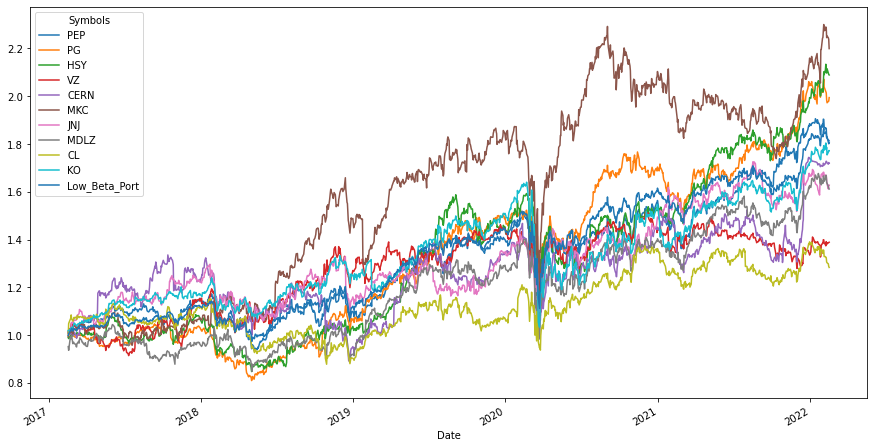

In [15]:
# Dollar Test
low_beta_df = low_beta_stocks.pct_change().dropna()
low_beta_df['Low_Beta_Port'] = low_beta_df.mean(axis=1)
(low_beta_df+1).cumprod().plot()
(low_beta_df+1).cumprod()[-1:]

<AxesSubplot:xlabel='Symbols'>

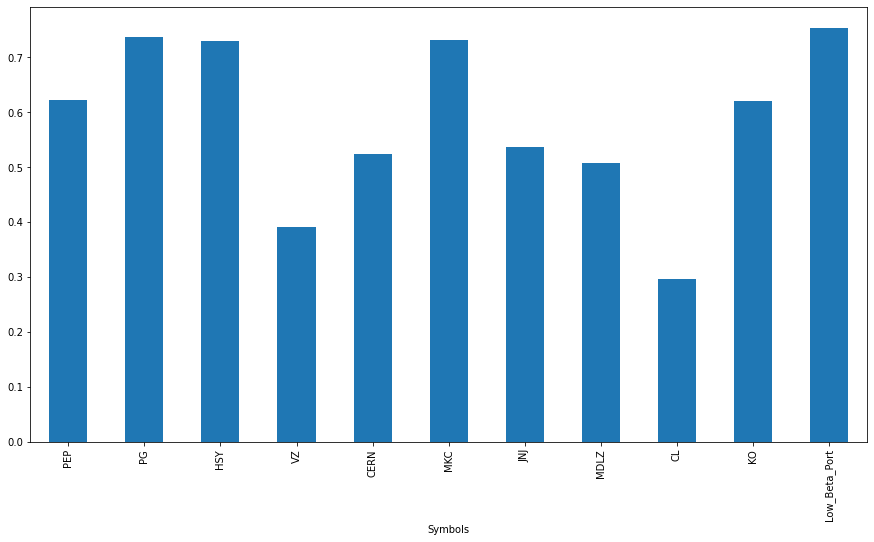

In [16]:
#Calculate Sharpe Ratio - useful calcuation to compare returns minus risk-free rate vs. risk (total standard deviation).  
#Sharpe ratios >1 are considered good. Sharpe ratios <1 not ideal.  The higher the better.


def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 252 #252 trading days in a year
rf =0.01 #1% risk free rate
low_beta_sharpe_ratio = low_beta_df.apply(sharpe_ratio, args=(N,rf,),axis=0)

low_beta_sharpe_ratio.plot.bar()

Text(0, 0.5, 'Sortino Ratio')

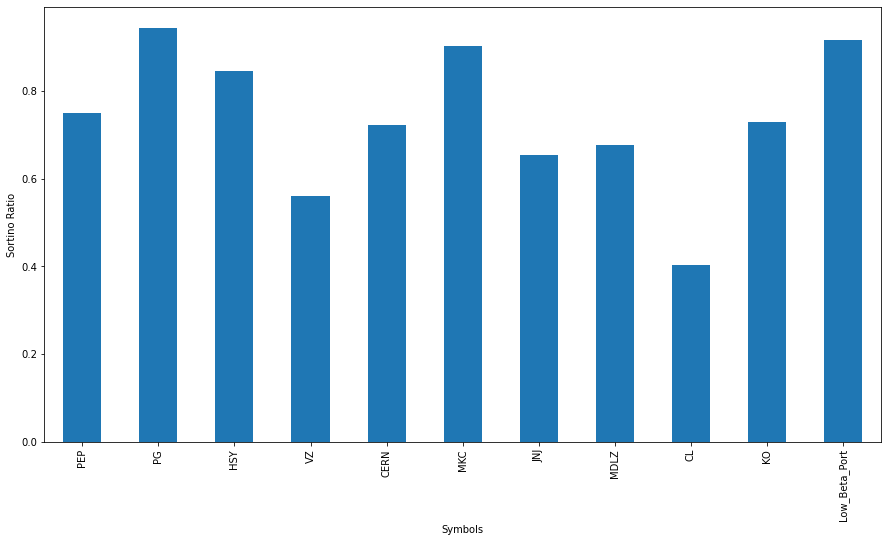

In [17]:
#Calculate Sortino Ratio The Sortino ratio is a useful way for investors, analysts, and portfolio managers 
#to evaluate an investment's return for a given level of downside deviation only whereas the sharpe ratio
#punishes stocks who have both positive and negative standard deviation (total standard deviation).  

def sortino_ratio(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg


low_beta_sortino_ratio = low_beta_df.apply(sortino_ratio, args=(N,rf,), axis=0 )
low_beta_sortino_ratio.plot.bar()
plt.ylabel('Sortino Ratio')

Text(0, 0.5, 'Max Drawdown')

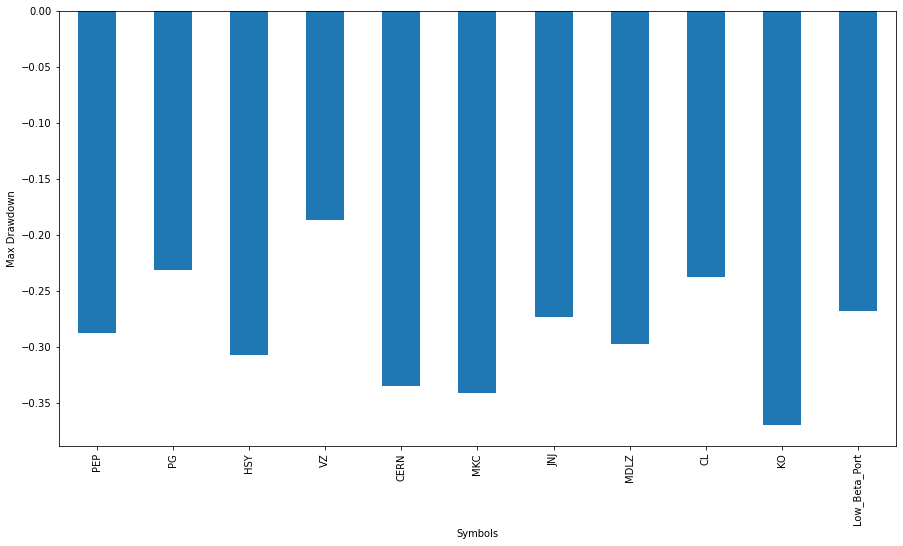

In [18]:
#Draw downs represent a pull back in stock prices and is measured from peak to bottom.  The stocks that tend to have 
#larger draw downs are usually those that have higher volatility.  


def max_drawdown(return_series):
    comp_ret = (return_series+1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()


low_beta_max_drawdowns = low_beta_df.apply(max_drawdown,axis=0)
low_beta_max_drawdowns.plot.bar()
plt.ylabel('Max Drawdown')

Text(0, 0.5, 'Calmar ratio')

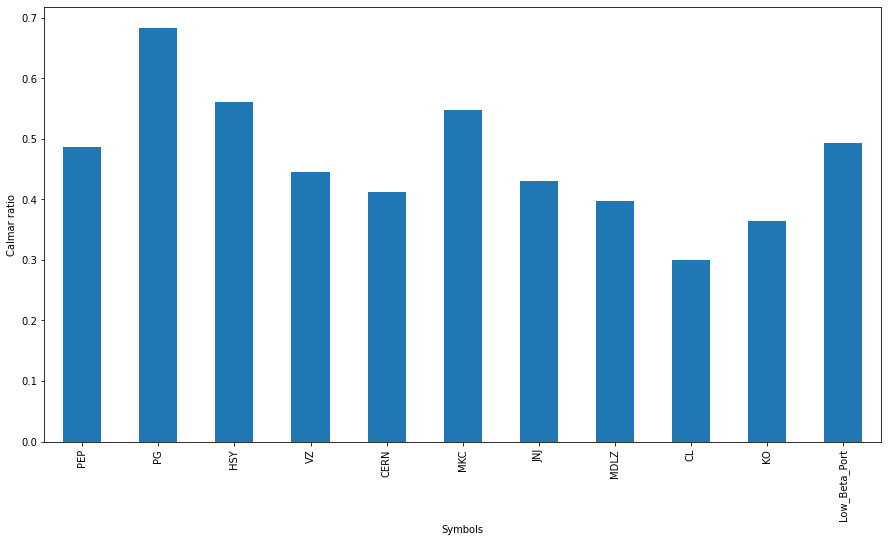

In [19]:
#Calmer ratio is similar to above ratio's instead we divide the percentage daily returns divided by the
#max draw down instead of standard deviation. 

low_beta_calmar_ratio = low_beta_df.mean()*252/abs(low_beta_max_drawdowns)

low_beta_calmar_ratio.plot.bar()
plt.ylabel('Calmar ratio')

In [20]:
btstats = pd.DataFrame()
btstats['sharpe'] = low_beta_sharpe_ratio
btstats['sortino'] = low_beta_sortino_ratio
btstats['maxdd'] = low_beta_max_drawdowns
btstats['calmar'] = low_beta_calmar_ratio

btstats

,sharpe,sortino,maxdd,calmar
Symbols,,,,
PEP,0.621323,0.748786,-0.288171,0.486116
PG,0.736765,0.944457,-0.231556,0.683555
HSY,0.728961,0.846332,-0.307673,0.561081
VZ,0.390614,0.560389,-0.187051,0.445212
CERN,0.524480,0.721112,-0.335327,0.412650
MKC,0.731571,0.903255,-0.341147,0.548078
JNJ,0.536317,0.654250,-0.273663,0.430150
MDLZ,0.506734,0.675742,-0.297419,0.397600
CL,0.296442,0.402707,-0.237735,0.299034
